This code produces ITCZ state as a function of absolute precipitation threshold, from 1 to 9.5 mm/day for a region of interest, in IMERG observations.

In [1]:
#Author: Alex Gonzalez
#Date: November 2025
#Paper: JGR-Atmospheres

Figure S3. East Pacific ITCZ state (%) as a function of absolute precipitation threshold
every 0.5 mm day−1, from 2 to 9 mm day−1 in IMERG (MW+IR, solid curves) and IMERG
(MW, dotted curves) observations for the months of a) December through May and b) June
through November, 1998–2024, for nITCZ (green curves), sITCZ (gold curves), aITCZ (blue
curves), dITCZ (red curves), and eITCZ (black curves). In this study, we choose an absolute
precipitation threshold of 5 mm day−1.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
#from netCDF4 import Dataset
import pandas as pd
#import netCDF4

from cartopy import config

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker

from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
dataset = ['IMERG','IMERG_mw']#,'GPCP']
folders = ['IMERG_1deg','IMERG_1deg']#,'GPCP_daily']

In [3]:
nmodels = len(dataset)
nmon = 12
month = np.arange(1,nmon+1,1)

month_xr = xr.DataArray(month, coords=[month], dims=['month'])
datasets_xr = xr.DataArray(dataset, coords=[dataset], dims=['dataset'])

In [4]:
yr0 = 1998
yrf = 2024
rain_thresh = np.arange(1,10.,0.5)
nthresh = len(rain_thresh)
yr_str = str(yr0)+'-'+str(yrf)

In [5]:
len(rain_thresh)

18

In [65]:
region = 'Atlantic'
region_str = 'Atlantic Ocean'

#region = 'Indian'
#region_str = 'Indian Ocean'

#region = 'CentPac'
#region_str = 'Central Pacific Ocean'

#region = 'WestPac'
#region_str = 'West Pacific Ocean'

#region = 'EastPac'
#region_str = 'East Pacific Ocean'

ndataset = len(dataset)
ndays = np.zeros((nmon))

prc_dITCZ = np.zeros((ndataset,nmon,nthresh))
prc_nITCZ = np.zeros((ndataset,nmon,nthresh))
prc_sITCZ = np.zeros((ndataset,nmon,nthresh))
prc_aITCZ = np.zeros((ndataset,nmon,nthresh))
prc_eITCZ = np.zeros((ndataset,nmon,nthresh))
for jj in range(0,ndataset):
    dri = '/srv/lss/'+folders[jj]+'/total_precip/'
    fni = dataset[jj]+'_ITCZ_st_daily_'+region+'_abs_thresh_all_mm.nc'

    data = xr.open_dataset(dri+fni, engine='netcdf4')
    time_all = data['time']
    cond = (time_all['time.year'] >= yr0) & (time_all['time.year'] <= yrf)
    itcz_state = data['itcz_state'].where(cond, drop=True)
    time = time_all.where(cond, drop=True)

    for mm in range(0,nmon):
        # set up conditional statements 
        cond1 = time_all['time.month'] == month[mm] # season of interest
        cond2 = (time_all['time.year'] >= yr0) & (time_all['time.year'] <= yrf)
        # now find only the times for year(s) and season of interest 
        time = time_all.where(cond1 & cond2, drop=True)
        ndays[mm] = len(time)

    ndays_xr = xr.DataArray(ndays,coords=[month], dims=['month'])
    
    cond_dITCZ = (itcz_state == 1)
    cond_nITCZ = (itcz_state == 2)
    cond_sITCZ = (itcz_state == 3)
    cond_aITCZ = (itcz_state == 4)
    cond_eITCZ = (itcz_state == 5)

    itcz_dI = xr.where(cond_dITCZ,1,0)
    itcz_nI = xr.where(cond_nITCZ,1,0)
    itcz_sI = xr.where(cond_sITCZ,1,0)
    itcz_aI = xr.where(cond_aITCZ,1,0)
    itcz_eI = xr.where(cond_eITCZ,1,0)
    
    prc_dITCZ[jj,:,:] = itcz_dI.groupby('time.month').sum('time')/ndays_xr*100
    prc_nITCZ[jj,:,:] = itcz_nI.groupby('time.month').sum('time')/ndays_xr*100
    prc_sITCZ[jj,:,:] = itcz_sI.groupby('time.month').sum('time')/ndays_xr*100
    prc_aITCZ[jj,:,:] = itcz_aI.groupby('time.month').sum('time')/ndays_xr*100
    prc_eITCZ[jj,:,:] = itcz_eI.groupby('time.month').sum('time')/ndays_xr*100


In [62]:
ndays

array([837., 763., 837., 810., 837., 810., 837., 837., 810., 837., 810.,
       806.])

In [63]:
ndays_xr = xr.DataArray(ndays,coords=[month], dims=['month'])

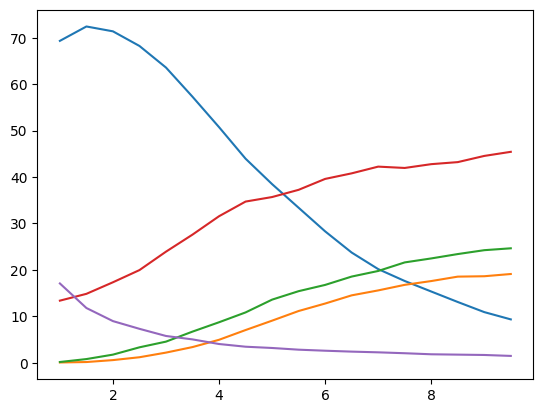

In [56]:
plt.plot(rain_thresh,prc_dITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_nITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_sITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_aITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_eITCZ[0,0:5,:].mean(axis=0).T)

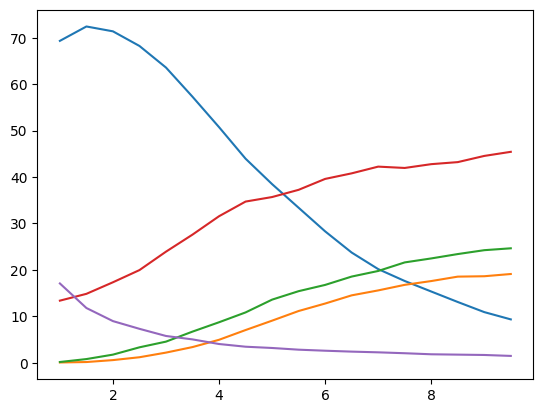

In [57]:
plt.plot(rain_thresh,prc_dITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_nITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_sITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_aITCZ[0,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_eITCZ[0,0:5,:].mean(axis=0).T)

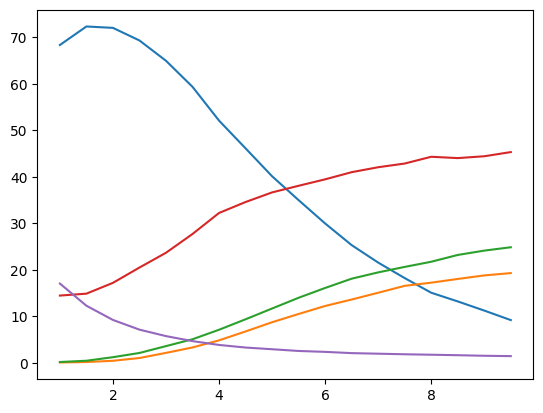

In [58]:
plt.plot(rain_thresh,prc_dITCZ[1,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_nITCZ[1,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_sITCZ[1,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_aITCZ[1,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_eITCZ[1,0:5,:].mean(axis=0).T)

In [45]:
plt.plot(rain_thresh,prc_dITCZ[2,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_nITCZ[2,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_sITCZ[2,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_aITCZ[2,0:5,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_eITCZ[2,0:5,:].mean(axis=0).T)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
plt.plot(rain_thresh,prc_dITCZ[0,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_nITCZ[0,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_sITCZ[0,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_aITCZ[0,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_eITCZ[0,5:,:].mean(axis=0).T)

In [ ]:
plt.plot(rain_thresh,prc_dITCZ[1,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_nITCZ[1,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_sITCZ[1,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_aITCZ[1,5:,:].mean(axis=0).T)
plt.plot(rain_thresh,prc_eITCZ[1,5:,:].mean(axis=0).T)

In [ ]:
plt.plot(rain_thresh,prc_nITCZ[0,0:5,:].mean(axis=0).T)

In [ ]:
colors_color_blind = ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB']

In [59]:
mon_SH = [11,0,1,2,3,4]
mon_NH = [5,6,7,8,9,10]

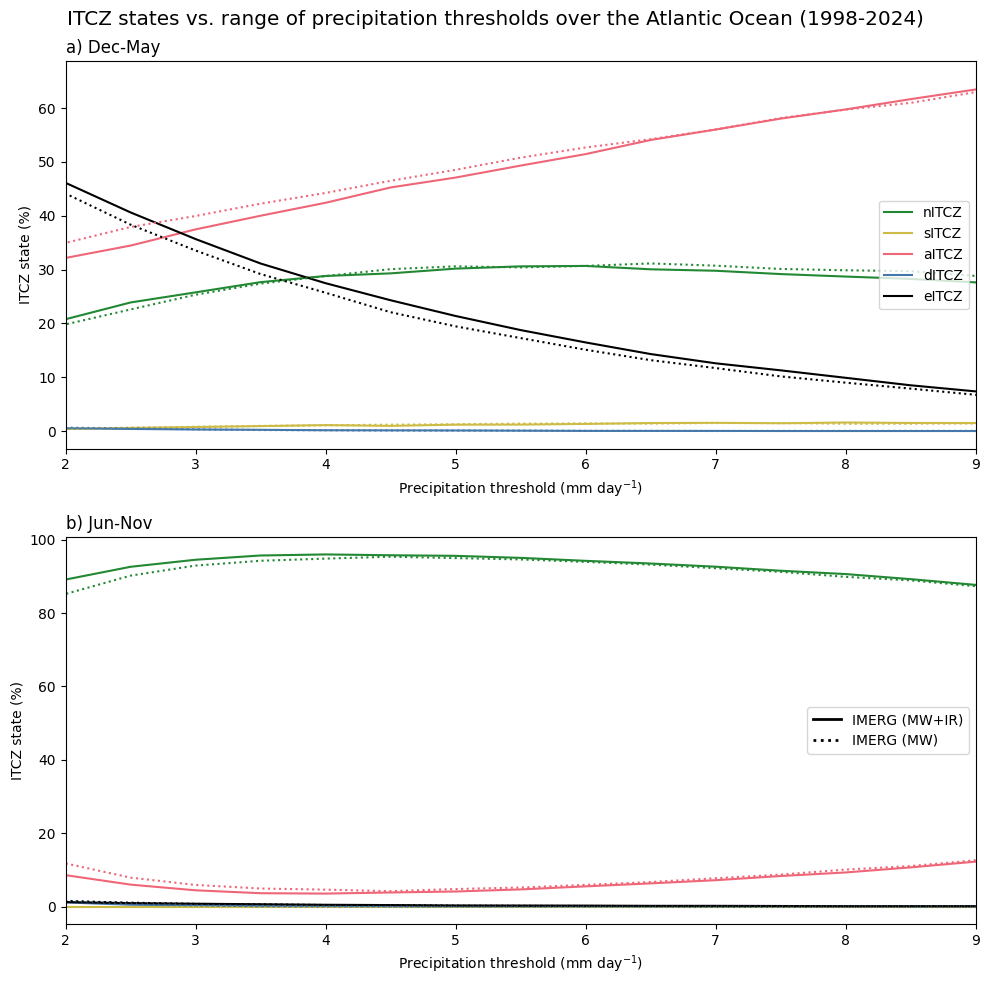

In [66]:
#if region == 'EastPac':
from matplotlib.lines import Line2D    
npan = 2
    
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(10, 10), tight_layout='true')
fig.suptitle(r'ITCZ states vs. range of precipitation thresholds over the '+region_str+' ('+yr_str+')',fontsize='x-large')
for jj in range(0,npan,1):
    ax = fig.add_subplot(npan,1,jj+1)
    plt.xlim(2,9)
    plt.xlabel(r'Precipitation threshold (mm day$^{-1}$)')
    plt.ylabel(r'ITCZ state (%)')

    custom_lines = [Line2D([0], [0], color="k", lw=2, label="IMERG (MW+IR)"),
                    Line2D([0], [0], color="k", lw=2, linestyle=':', label="IMERG (MW)"),]
    custom_handles = custom_lines
    if jj==0:
        ax.set_title('a) Dec-May', loc='left')
        plt.plot(rain_thresh,prc_nITCZ[0,mon_SH,:].mean(axis=0).T, color=colors_color_blind[2],label='nITCZ')
        plt.plot(rain_thresh,prc_sITCZ[0,mon_SH,:].mean(axis=0).T, color=colors_color_blind[3],label='sITCZ')
        plt.plot(rain_thresh,prc_aITCZ[0,mon_SH,:].mean(axis=0).T, color=colors_color_blind[1],label='aITCZ')
        plt.plot(rain_thresh,prc_dITCZ[0,mon_SH,:].mean(axis=0).T, color=colors_color_blind[0],label='dITCZ')
        plt.plot(rain_thresh,prc_eITCZ[0,mon_SH,:].mean(axis=0).T, color='k',label='eITCZ')
        plt.legend(ncol=1,loc=5)
        
        plt.plot(rain_thresh,prc_nITCZ[1,mon_SH,:].mean(axis=0).T, color=colors_color_blind[2],linestyle=':')
        plt.plot(rain_thresh,prc_sITCZ[1,mon_SH,:].mean(axis=0).T, color=colors_color_blind[3],linestyle=':')
        plt.plot(rain_thresh,prc_aITCZ[1,mon_SH,:].mean(axis=0).T, color=colors_color_blind[1],linestyle=':')
        plt.plot(rain_thresh,prc_dITCZ[1,mon_SH,:].mean(axis=0).T, color=colors_color_blind[0],linestyle=':')
        plt.plot(rain_thresh,prc_eITCZ[1,mon_SH,:].mean(axis=0).T, color='k',linestyle=':')

        #plt.plot(rain_thresh,prc_nITCZ[2,0:5,:].mean(axis=0).T, color=colors_color_blind[2],linestyle='--')
        #plt.plot(rain_thresh,prc_sITCZ[2,0:5,:].mean(axis=0).T, color=colors_color_blind[3],linestyle='--')
        #plt.plot(rain_thresh,prc_aITCZ[2,0:5,:].mean(axis=0).T, color=colors_color_blind[1],linestyle='--')
        #plt.plot(rain_thresh,prc_dITCZ[2,0:5,:].mean(axis=0).T, color=colors_color_blind[0],linestyle='--')
        #plt.plot(rain_thresh,prc_eITCZ[2,0:5,:].mean(axis=0).T, color='k',linestyle='--')
    if jj==1:
        ax.set_title('b) Jun-Nov', loc='left')
        plt.plot(rain_thresh,prc_nITCZ[0,mon_NH,:].mean(axis=0).T, color=colors_color_blind[2],label='nITCZ')
        plt.plot(rain_thresh,prc_sITCZ[0,mon_NH,:].mean(axis=0).T, color=colors_color_blind[3],label='sITCZ')
        plt.plot(rain_thresh,prc_aITCZ[0,mon_NH,:].mean(axis=0).T, color=colors_color_blind[1],label='aITCZ')
        plt.plot(rain_thresh,prc_dITCZ[0,mon_NH,:].mean(axis=0).T, color=colors_color_blind[0],label='dITCZ')
        plt.plot(rain_thresh,prc_eITCZ[0,mon_NH,:].mean(axis=0).T, color='k',label='eITCZ')
        plt.legend(handles=custom_handles, loc=5)

        plt.plot(rain_thresh,prc_nITCZ[1,mon_NH,:].mean(axis=0).T, color=colors_color_blind[2],linestyle=':')
        plt.plot(rain_thresh,prc_sITCZ[1,mon_NH,:].mean(axis=0).T, color=colors_color_blind[3],linestyle=':')
        plt.plot(rain_thresh,prc_aITCZ[1,mon_NH,:].mean(axis=0).T, color=colors_color_blind[1],linestyle=':')
        plt.plot(rain_thresh,prc_dITCZ[1,mon_NH,:].mean(axis=0).T, color=colors_color_blind[0],linestyle=':')
        plt.plot(rain_thresh,prc_eITCZ[1,mon_NH,:].mean(axis=0).T, color='k',linestyle=':')
        
figfolder = '/home/alex.gonzalez/CMIP6_ITCZ_state_project/figures/methods_paper/revision/'
plt.savefig(figfolder+'Precip_thresh_range_obs_'+region+'.pdf',bbox_inches="tight",transparent=False,dpi=150)